### Supervised vs unsupervised learning
- Supervised learning finds patterns for a prediction task
- Unsupervised learning finds patterns in data

### k-means clustering
- finds clusters of sample
- number of clusters must be specified
- implemented in sklearn

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
iris = load_iris()
samples = iris.data  # Ensuring it is a NumPy array

# Initialize the KMeans model
model = KMeans(n_clusters=3) # Specifying 3 cluster as there are three species of iris

# Fit the model
model.fit(samples)

KMeans(n_clusters=3)

In [3]:
labels = model.predict(samples)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


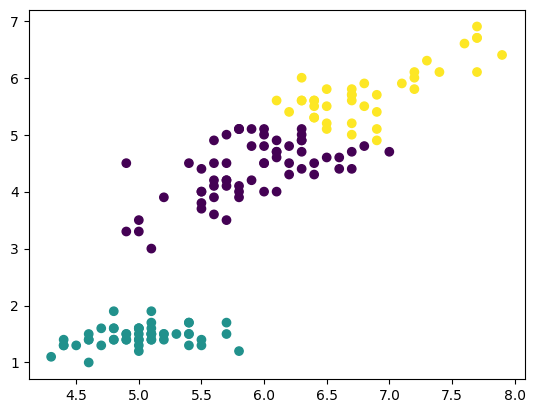

In [10]:
xs = samples[:,0]
ys = samples[:,2]
plt.scatter(xs, ys,c=labels)
plt.show()

In [16]:
labels = [0, 0, 1, 2]
species = ['setosa', 'setosa' , 'versicolor', 'virginica']
print(species)

['setosa', 'setosa', 'versicolor', 'virginica']


In [17]:
df = pd.DataFrame({'labels': labels, 'species': species})
print(df)

   labels     species
0       0      setosa
1       0      setosa
2       1  versicolor
3       2   virginica


In [19]:
# Crosstab of labels and species
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species  setosa  versicolor  virginica
labels                                
0             2           0          0
1             0           1          0
2             0           0          1


In [21]:
model = KMeans(n_clusters=3)
model.fit(samples)
print(model.inertia_)

78.85566582597731


### How many clusters to choose?
- Good clustering has tight clusters (so low inertia)
- but not too many cluster!
- Choose an 'elbow' in the inertia plot
- where inertia begins to decrease more slowely

In [26]:
wines = pd.read_csv('wines.csv')

# Step 2: Ensure only numeric columns are used (drop non-numeric data if needed)
wines_numeric = wines.select_dtypes(include=[np.number])  # Keep only numeric columns
wines_samples = wines_numeric.values  # Convert the DataFrame to a NumPy array

# Step 3: Initialize the KMeans model and fit/predict clusters
model = KMeans(n_clusters=3)
labels = model.fit_predict(wines_samples)

# Step 4: Output the predicted labels
print(labels)

[0 0 2 2 0 2 2 2 0 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 2 0 0 2 2 0 2 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 2 2 2 2 2 0 2 0 2 2 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1]


In [ ]:
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)

In [27]:
# Sklearn StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(samples)
StandardScaler(copy=True, with_mean=True, with_std=True)
samples_scaled=scaler.transform(samples)

In [30]:
# Pipelines combine multiple steps
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(samples)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [31]:
labels=pipeline.predict(samples)

### Hierarchal clustering
- Every country begins in a separate cluster
- Two clusters are merged
- Continue until all countries in a single cluster
- "agglomerative" hierarchical clustering

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(samples, method='complete')
dendrogram(mergings, labels=country_names, leaf_rotation=90, leaf_font_size=6)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import linkage
mergings = linkage(samples, method='complete')
from scipy.cluster.hierarchy import fcluster
labels = fcluster(mergings, 15, criterion='distance')
print(labels)

In [ ]:
# Aligning cluster labels with country names
import pandas as pd
pairs = pd.DataFrame({'labels': labels, 'countries': country_names})
print(pairs.sort_values('labels'))

### t-SNE for 2-dimensional maps
- t-SNE = 't-distributed stochastic neighbor embedding'
- Maps samples to 2D space
- Map preserves nearness of sample
- Great for inspecting datasets

In [ ]:
# t-SNE in sklearn
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)
transformed = model.fit_transform(samples)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=species)
plt.show()

### t-SNE has only fit_transform()
- Has a fit_transform() method
- Simultaneously fits the model and transforms the data
- Has no separate fit() or transform() methods
- Can't extend the map to include new data samples

### Principal Component Analysis
- PCA = 'Principal Component Analysis'
- Fundamental dimension reduction technique
- First step 'decorrelation'
- Second step reduces dimension

### PCA aligns data with axes
- Rotates data samples to be aligned with axes
- Shifts data samples so theu have mean 0
- No information is lost

In [ ]:
from sklearn.decomposition import PCA 
model = PCA()
model.fit(samples)
transformed = model.transform(samples)
print(transformed)

### Pearson correlation
- Measures linear correlation of features
- Value between -1 and 1
- Value of 0 means no linear correlation

### Principal components
- 'Principal components' = directions of variance
- PCA aligns principal components with the axes

In [ ]:
print(model.components)

### PCA identifies intrinstic dimension
- Scatter plots work only if samples have 2 or 3 features
- PCA indentifies intrinsic dimension when samples have any number of features
- Intrinsic dimension = number of PCA features with significant variance

In [ ]:
pca = PCA()
pca.fit(samples)
features = range(pca.n_compoents_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [ ]:
pca = PCA()
pca.fit(samples)

transformed = pca.transform(samples)
print(transformed.shape)

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=species)
plt.show()

### Word frequency arrays
- Rows represent documents, columns represent words
- Entries measure presence of each word in each document

### Sparse arrays and csr_matrix
- use scipy.sparse.csr_matrix 

### TruncatedSVD and csr_matrix
- scikit-learn PCA doesn't support csr_matrix
- so use TruncatedSVD instead

In [ ]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)


In [ ]:
# NMF
from sklearn.decomposition import NMF
model = NMF(n_components=2)
model.fit(samples)
nmf_features = model.transform(samples)
print(model.components_)
print(model.features)

In [ ]:
# Reconstruction of a sample
print(samples[i,:])
print(nmf_features[i,:])

### Sample reconstruction
- Multiply components by feature values, and add up
- Also can be expressed as a product of matrices
- This is the 'Matrix Factorization' in NMF
- NMF fits to non-negative data only

### Grayscale images
- 'Grayscale' image = no colors,only shaed of gray
- Measure pixel brightness
- Represent with value between 0 and 1(0 is black)

### Encoding a collection of images
- Collection of images of the same size
- Encode as 2D array
- Each row corresponds to an image
- Each column corresponds to a pixel

In [ ]:
# Visualizing
bitmap = samples.reshape((2,3))
print(bitmap)

plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.show()

In [ ]:
# Caluculate the cosine similarities
from sklearn.preprocessing import normalize
norm_features = normalize(nmf_features)
# if has index 23
current_article = norm_features[23,:]
similarities = norm_features.dot(current_article)
print(similarities)

In [ ]:
# DataFrame and labels
norm_features = normalize(nmf_features)
df = pd.DataFrame(norm_features, index=titles)
current_article = df.loc['Dog bits man']
similarities = df.dot(current_article)
print(similarities.nlargest())